<b><h1>Saliency Maps Calculation Below</h1></b>

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import numpy as np
from scipy.interpolate import interp1d
from PIL import Image, ImageDraw
import os
import cv2
%matplotlib inline

In [77]:
# configuration parameters (only change these values)
width = 200
height = 200
step_size = 30

<b><h1>Functions used</h1></b>

In [78]:
def saliency_grained(image_path):
    # compute saliency using spectral residual approach (opencv)
    image = cv2.imread(image_path)
    # image = cv2.GaussianBlur(img, (3,3), 0)
    saliency = cv2.saliency.StaticSaliencyFineGrained_create()
    (success, saliencyMap) = saliency.computeSaliency(image)
    meanSal = np.mean(saliencyMap) * 255
    varSal = np.var(saliencyMap) * 255
    salThresh = meanSal + (5 * np.sqrt(varSal))
    
    saliencyMap_m2 = (saliencyMap * 255).astype('uint8')
    return saliencyMap_m2, salThresh

def saliency_residual(image_path):
    # compute saliency using spectral residual approach (opencv)
    image = cv2.imread(image_path)
    # image = cv2.GaussianBlur(image, (5,5), 0)
    saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
    (success, saliencyMap) = saliency.computeSaliency(image)
    meanSal = np.mean(saliencyMap) * 255
    varSal = np.var(saliencyMap) * 255
    salThresh = meanSal + (5 * np.sqrt(varSal))
    saliencyMap_m1 = (saliencyMap * 255).astype('uint8')
    return saliencyMap_m1, salThresh


def threshold(saliency_map, salThresh):
    #threshold the fine grained method (seems better)
    threshMap = cv2.threshold(saliency_map.astype("uint8"), salThresh, 255,
    cv2.THRESH_BINARY)[1]
    return threshMap

def salient_img(threshMap, image_path, stepsize=step_size):
    image = cv2.imread(image_path)
    bin_image = np.zeros([200,200], dtype=int)
    thresh = stepsize**2 / 2
    for i in range(height):
        for j in range(width):
            data = threshMap[i:i+stepsize, j:j+stepsize]
            non_zero = np.count_nonzero(data)
            if non_zero >= thresh:
                bin_image[i:i+stepsize, j:j+stepsize] = 1
    rhi_img = image[...,::-1]
    rhi_img[:,:,0] = np.multiply(bin_image, rhi_img[:,:,0])
    rhi_img[:,:,1] = np.multiply(bin_image, rhi_img[:,:,1])
    rhi_img[:,:,2] = np.multiply(bin_image, rhi_img[:,:,2])
        
    return rhi_img

<b><h1>Example of saliency applied to data</h1></b>

In [68]:
root_path = 'Wood_Dataset/Train/2'

Opening image: Wood_Dataset/Train/2/69_2.jpg


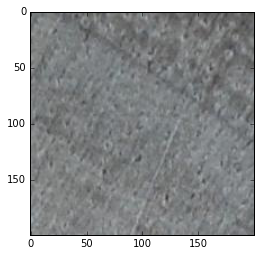

In [69]:
# open image
i = 100
files = os.listdir(root_path)
image = os.path.join(root_path, files[i])
print('Opening image: {}'.format(image))
img = mpimg.imread(image)
plt.imshow(img)
plt.show()

<b><h2>Spectral Residual Method (fine grained better here)</h2></b>

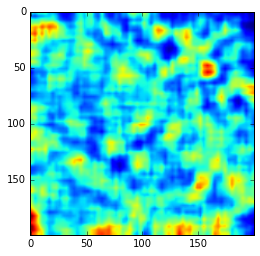

In [70]:
residual_saliency, thresh_calc = saliency_residual(image)
plt.imshow(residual_saliency)

<b><h2>Fine Grained Method</h2></b>

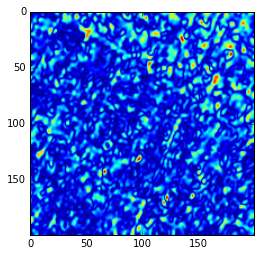

In [71]:
grained_saliency, thresh_calc = saliency_grained(image)
plt.imshow(grained_saliency)

<b><h2>Applying threshold</h2></b>

Threshold set to: 56.24921139936997


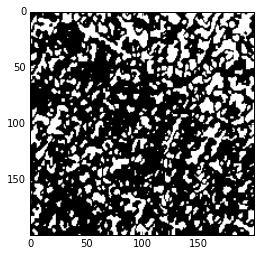

In [72]:
thresh_im = threshold(grained_saliency, thresh_calc)
print('Threshold set to: {}'.format(str(thresh_calc)))
plt.imshow(thresh_im, cmap='gray')

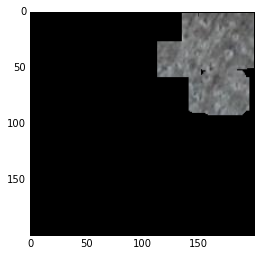

In [73]:
rhi_img = salient_img(thresh_im, image)
plt.imshow(rhi_img)

<b><h1>Genrate RHI images for testing and training data</h1></b>

In [79]:
root_train = 'Wood_Dataset_Salient/Train'
root_test  = 'Wood_Dataset_Salient/Test'

In [83]:
# calculating saliency maps for training images
for lbls in range(12):
    path = os.path.join(root_train, str(lbls + 1))
    print('Calculating Saliency maps for : {}'.format(path))
    files = os.listdir(path)
    for item in files:
        grained_saliency, thresh_calc = saliency_grained(os.path.join(path,item))
        thresh_im = threshold(grained_saliency, thresh_calc)
        rhi_img = salient_img(thresh_im, os.path.join(path,item))
        mpimg.imsave(os.path.join(path,item), rhi_img)

Calculating Saliency maps for : Wood_Dataset_Salient/Train/1
Calculating Saliency maps for : Wood_Dataset_Salient/Train/2
Calculating Saliency maps for : Wood_Dataset_Salient/Train/3
Calculating Saliency maps for : Wood_Dataset_Salient/Train/4
Calculating Saliency maps for : Wood_Dataset_Salient/Train/5
Calculating Saliency maps for : Wood_Dataset_Salient/Train/6
Calculating Saliency maps for : Wood_Dataset_Salient/Train/7
Calculating Saliency maps for : Wood_Dataset_Salient/Train/8
Calculating Saliency maps for : Wood_Dataset_Salient/Train/9
Calculating Saliency maps for : Wood_Dataset_Salient/Train/10
Calculating Saliency maps for : Wood_Dataset_Salient/Train/11
Calculating Saliency maps for : Wood_Dataset_Salient/Train/12


In [ ]:
path = root_test
print('Calculating Saliency maps for : {}'.format(path))
files = os.listdir(path)
for item in files:
    grained_saliency, thresh_calc = saliency_grained(os.path.join(path,item))
    thresh_im = threshold(grained_saliency, thresh_calc)
    rhi_img = salient_img(thresh_im, os.path.join(path,item))
    mpimg.imsave(os.path.join(path, item), rhi_img)
print('Done!')